<a href="https://colab.research.google.com/github/ltocasuche/Metodos1_Fernando_Bareno_Y_Laura_Tocasuche/blob/main/Parcial_2_Parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

26. Considera la función $f(x) = x^3$ en el intervalo $[0,2]$. Utiliza la suma de Riemann con $n$ subintervalos para apoximar la integral de $f(x)$ en este intervalo.

$$
  \int^{2}_{0} x^3 dx
$$

(a) (**teórico**) Calcule el ancho de cada subintervalo $(\Delta x = \frac{b-a}{n})$

La suma de Riemann se construye como la suma de los cuadrados formados con base en los subintervalos de una partición uniforme, esto quiere decir que el intervalo se divide en $n$ partes iguales. El tamaño de cada intervalo $\Delta x$ es el mismo y se puede calcular como la longitud del intervalo $\ell = b-a$ sobre el numero de subintervalos de la partición: $\Delta x = \frac{\ell}{n} = \frac{b-a}{n}$

In [ ]:
def delta_x(a, b, n=10):
    return (b - a) / n

In [ ]:
delta_x(0, 2)

0.2

(b) Escriba los valores nodales $x_i = a + i\Delta x$ para $i = 0,1,2,\ldots,n-1$, que dividen el intervalo $[0,2]$

In [ ]:
def nodal_values (a, b, n=10):
    delta_x_ = delta_x(a, b, n)
    x_i = np.array([a + i * delta_x_ for i in range(n)])
    return x_i

In [ ]:
nodal_values(0, 2)

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8])

(c) Escriba los valores de la funcion $f(x_i) = x_i^3$ en los puntos nodales obtenidos en el apartado (b).

In [ ]:
def f_nodal_values(x_i):
    return x_i ** 3

In [ ]:
f_nodal_values(nodal_values(0, 2))

array([0.   , 0.008, 0.064, 0.216, 0.512, 1.   , 1.728, 2.744, 4.096,
       5.832])

(d) Muestre que la suma de Riemann es:

$$
  I \approx \sum_{i=0}^{n-1} f(x_i)\Delta x = 4(1-\frac{2}{n} + \frac{1}{n^2})
$$

La siguiente suma es útil:

$$
  \sum_{i=0}^{n-1} i^3 = \frac{ (n(n-1))^2 }{4}
$$

Demostracion algebraica:
\begin{equation}
\begin{split}
  \sum_{i=0}^{n-1} f(x_i)\Delta x &= \sum_{i=0}^{n-1} (a + i\Delta x)^3\Delta x\\
  &= \sum_{i=0}^{n-1} (a^3 + 3a^2 i\Delta x + 3a i^2\Delta x^2 + i^3\Delta x^3)\Delta x\\
  para: a = 0, b = 2, \Delta x = \frac{b-a}{n} = \frac{2}{n}\\
  &= \sum_{i=0}^{n-1} i^3 \left( \frac{2}{n} \right)^4\\
  &= \frac{16}{n^4}\sum_{i=0}^{n-1} i^3\\
  &=\frac{16}{n^4} \frac{ (n(n-1))^2 }{4}\\
  &=\frac{4(n-1)^2}{n^2}\\
  &=\frac{4(n^2 - 2n + 1)}{n^2}\\
  \sum_{i=0}^{n-1} f(x_i)\Delta x &= 4( 1 - \frac{2}{n} + \frac{1}{n^2})
\end{split}
\end{equation}

In [ ]:
def int_sumatoria(a=0, b=2, n=10):
    return (f_nodal_values(nodal_values(a, b, n)) * delta_x(a, b, n)).sum()

In [ ]:
def int_ecuacion (n=10):
    return 4 * (1 - 2/n + 1/n**2)

(e) **(computacional)** Escriba un código para encontrar la aproximación de la integral para $n = 30$.

In [ ]:
# Demostración numérica:

def suma_riemann (n=10):
    int_real = 4 # x^4 /4|0,2 = (2)^4 /4 - (0)^4 /4 = 4
    int_suma = np.zeros(n)
    int_calculada = np.zeros(n)
    for i in range(1,n):
        int_suma[i] = int_sumatoria(n=i)
        int_calculada[i] = int_ecuacion(n=i)
    plt.plot(int_suma, color = 'r', label = "Suma de Riemann por iteración")
    plt.plot(int_calculada, color = 'b', linestyle = (0,(5,5)), label = "Suma de Riemann con ecuación")
    plt.axhline(int_real, color = "g", linewidth = 1, linestyle = "dashed", label = "Valor Real de la Itegral");
    plt.legend()
    plt.xlabel('Limite de la sumatoria (n)')
    plt.ylabel('Valor de la integral (I)')
    return int_suma[-1], int_calculada[-1], int_real

(3.728894173602854, 3.728894173602854, 4)

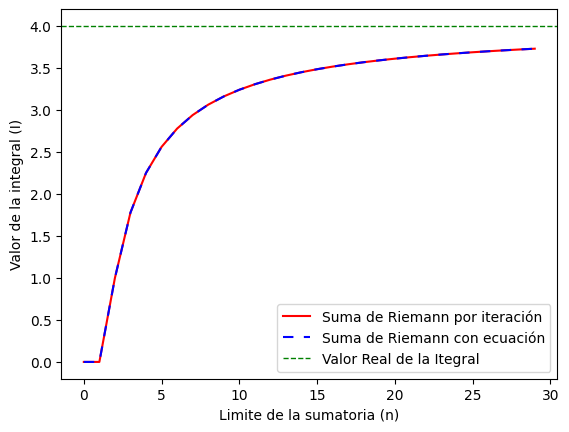

In [ ]:
suma_riemann(30)

(f) Dibuje el error de la estimación $\epsilon = |I_{exacta} - I_{estimada}|$ como unafunción de $n$. Use un array *np.linspace(30,400,100, endpoint = False)*.

In [ ]:
def graf_error ():
    n = np.linspace(30,400,100, endpoint = False)
    error = np.zeros_like(n)
    for i in range(len(n)):
        error[i] = np.abs(4 - int_ecuacion(n=i+1))
    plt.plot(n, error)
    plt.xlabel('Limite de la sumatoria (n)')
    plt.ylabel('Error (ϵ)')
    return error[-1]


0.07960000000000012

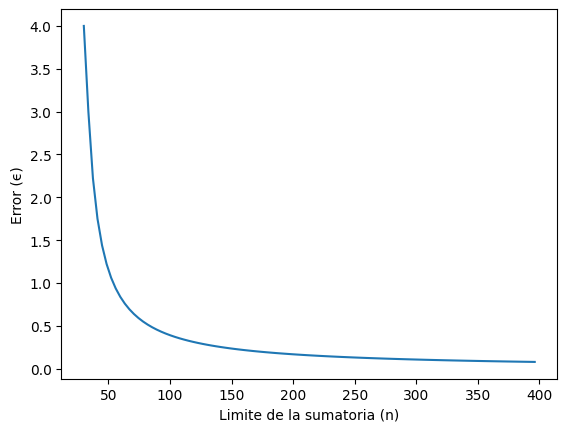

In [ ]:
graf_error()

(g) Es la suma de Riemann una buena estrategía para estimar integrales? Justifique su respuesta con lo aprendido en cuadratura de Gauss.

No, la suma de Riemann es una mala estrategia puesto que si nos damos cuenta el error es del orden de $n$
$$
  \epsilon = |I_{exacta} - I_{estimada}|; I_estimada \propto n \\
  \Rightarrow \epsilon \propto n$
$$

27. En este problema, va a encontrar la regla de cuadratura de 4 puntos usando la definición formal y la base polinomial canónica: $x^0, x^1, \ldots, x^n$.

(a) La definición de regla de cuadratura de Gauss está dada por:

$$
  \int_{-1}^{1} x^k dx = \sum_{i=0}^{3} w_i(x_i)^k,\;\;\;\; k = 0, 1, \ldots, N
$$

Para la regla de 4 puntos, necesitamos $N = 8$ ecuaciones no-lienales para encontrar las 8 constantes.

\begin{equation}
\begin{split}
  \int_{-1}^{1} x^0 dx &= w_0 + w_1 + w_2 + w_3\\
  \int_{-1}^{1} x^1 dx &= w_0x_0 + w_1x_1 + w_2x_2 + w_3x_3\\
  \vdots \;\;\;\; &= \;\;\;\; \vdots
\end{split}
\end{equation}

Escriba las ocho ecuaciones e implemente usando la tupla usada en clase:

In [ ]:
G=(lambda w_0,w_1,w_2,w_3,  x_0,x_1,x_2,x_3:    w_0*(x_0**0) + w_1*(x_1**0) + w_2*(x_2**0) + w_3*(x_3**0) - 2., \
   lambda w_0,w_1,w_2,w_3,  x_0,x_1,x_2,x_3:    w_0*(x_0**1) + w_1*(x_1**1) + w_2*(x_2**1) + w_3*(x_3**1) - 0., \
   lambda w_0,w_1,w_2,w_3,  x_0,x_1,x_2,x_3:    w_0*(x_0**2) + w_1*(x_1**2) + w_2*(x_2**2) + w_3*(x_3**2) - (2./3.), \
   lambda w_0,w_1,w_2,w_3,  x_0,x_1,x_2,x_3:    w_0*(x_0**3) + w_1*(x_1**3) + w_2*(x_2**3) + w_3*(x_3**3) - 0., \
   lambda w_0,w_1,w_2,w_3,  x_0,x_1,x_2,x_3:    w_0*(x_0**4) + w_1*(x_1**4) + w_2*(x_2**4) + w_3*(x_3**4) - (2./5.), \
   lambda w_0,w_1,w_2,w_3,  x_0,x_1,x_2,x_3:    w_0*(x_0**5) + w_1*(x_1**5) + w_2*(x_2**5) + w_3*(x_3**5) - 0., \
   lambda w_0,w_1,w_2,w_3,  x_0,x_1,x_2,x_3:    w_0*(x_0**6) + w_1*(x_1**6) + w_2*(x_2**6) + w_3*(x_3**6) - (2./7.), \
   lambda w_0,w_1,w_2,w_3,  x_0,x_1,x_2,x_3:    w_0*(x_0**7) + w_1*(x_1**7) + w_2*(x_2**7) + w_3*(x_3**7) - 0.)

(b) Modifique el código para que la función vectorial $\vec{F}(x)$ reciba las ocho variables.

In [ ]:
def F(G,*r):

  n = len(G)
  v = np.zeros_like(G)
  for i in range(n):
    v[i] = G[i](*r) # vector columna de funciones evaluadas

  return v

In [ ]:
r =np.array([0,1,2,3,0,1,2,3])
F(G,*r)

array([6, 14, 36, 98, 276, 794, 2316, 6818], dtype=object)

(c) Modifique el código para calcular las 64 componentes que definen el *Jacobiano*.

In [ ]:
def Jacobian(F, G, *r, h=1e-10):
  n = len(r)
  J = np.zeros((n,n))
  for j in range(n):
    ant = np.copy(r)
    pos = np.copy(r)
    ant[j] -= h
    pos[j] += h
    diff_parcial = (F(G, *pos) - F(G, *ant)) / (2 * h)
    J[:,j] = diff_parcial
  return J

In [ ]:
r =np.array([0,1,2,3,0,1,2,3])
Jacobian(F,G,*r)

array([[0.0000e+00, 5.0000e+09, 5.0000e+09, 5.0000e+09, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00],
       [0.0000e+00, 5.0000e+09, 1.0000e+10, 1.5000e+10, 0.0000e+00,
        5.0000e+09, 1.0000e+10, 1.5000e+10],
       [0.0000e+00, 5.0000e+09, 2.0000e+10, 4.5000e+10, 0.0000e+00,
        5.0000e+09, 3.0000e+10, 7.5000e+10],
       [0.0000e+00, 5.0000e+09, 4.0000e+10, 1.3500e+11, 0.0000e+00,
        5.0000e+09, 7.0000e+10, 2.8500e+11],
       [0.0000e+00, 5.0000e+09, 8.0000e+10, 4.0500e+11, 0.0000e+00,
        5.0000e+09, 1.5000e+11, 9.7500e+11],
       [0.0000e+00, 5.0000e+09, 1.6000e+11, 1.2150e+12, 0.0000e+00,
        5.0000e+09, 3.1000e+11, 3.1650e+12],
       [0.0000e+00, 5.0000e+09, 3.2000e+11, 3.6450e+12, 0.0000e+00,
        5.0000e+09, 6.3000e+11, 9.9750e+12],
       [0.0000e+00, 5.0000e+09, 6.4000e+11, 1.0935e+13, 0.0000e+00,
        5.0000e+09, 1.2700e+12, 3.0885e+13]])

(d) Use el método del descenso del gradiente para estimar los 4 pesos $(wi)$ y los 4 puntos de Gauss $(xi)$. Tenga en cuenta que la semilla debe ser un vector aleatorio en el intervalo $[-1,1]$, i.e, *r_0 = np.random.uniform(-1.,1.,size=8)*.

In [ ]:
def Metric(G,*r):
  return 0.5*np.linalg.norm(F(G,*r))**2

In [ ]:
def Minimizer(F, G, r, gamma=0.01, epochs=int(1e4), error=1e-10):

  metric = 1
  it = 0

  while metric > error and it < epochs:

    J = Jacobian(F, G,*r)
    Vector = F(G,*r)
    r = r - gamma*np.dot(J,Vector)

    metric = Metric(G,*r)
    it += 1
    if metric < 0.005:
        gamma = 0.001

  return r,it, metric

In [ ]:
r= np.random.uniform(-1.,1.,size=8)
Minimizer(F, G, r)

(array([0.28375167001325596, -0.03991646217376766, 0.6584787223861944,
        -0.8363674340145527, -0.08666123528468005, -0.8470937381516856,
        0.5001146902841597, 0.40571050069417064], dtype=object),
 1000,
 0.004035442514497433)

(f) Use la regla encontrada para estimar la integral:

$$
  \int_{-1}^{1} cos(x) dx = \sum w_i f(x_i) \approx 1.68294168
$$

su regla debe estimar la integral al menos con dos chifras de precisión

In [ ]:
def estimacion_cos (F, G, r):
    w,_,_ = Minimizer(F, G, r)
    return w[0]*np.cos(w[4]) + w[1]*np.cos(w[5]) + w[2]*np.cos(w[6]) + w[3]*np.cos(w[7])

In [ ]:
r= np.random.uniform(-1.,1.,size=8)
r

array([-0.6522769 , -0.40924149, -0.82303061,  0.31767953, -0.41820626,
        0.9845116 , -0.7399403 ,  0.91232175])

In [ ]:
# mejor r encontrador = array([-0.43835311, -0.49374854,  0.38062243,  0.04182098,  0.83846713, 0.44829663,  0.04338191,  0.67963616])
# el problema parece ser muy dependiente de los parametros iniciales
estimacion_cos(F, G, r)

1.726908997895898

(g) ¿Cuál es la razón de que esta estimación sea tan poco precisa?

Esto se debe a que el error es del orden de $N$ siendo este mismo el numero de iteraciones en el calculo del desenso del gradiente. Podemos dejar como conclsuion que el desenso del jacobiano es más lento que otros metdos para calcular los pesos.